In [54]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import numpy as np

data = pd.read_csv('preprocess.csv')  
 
data = data.drop(columns=['Weight'])

X = data.drop(columns=['Price'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

def mean_squared_percentage_error(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred) / y_true)) * 100

mspe = mean_squared_percentage_error(y_test, y_pred)
print(f"Mean Squared Percentage Error (MSPE): {mspe}")

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
data


Root Mean Squared Error (RMSE): 340.64957668311376
Mean Absolute Error (MAE): 193.4041145144523
R-squared (R2): 0.7761963094519461
Mean Squared Percentage Error (MSPE): 16.732775742815857
Mean Absolute Percentage Error (MAPE): 21.34905630730405%


,CPU Mark,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,Encoded_Brand,Price,Encoded_OS
0,26454,14691,15.6,1920,1080,16.0,2048.0,23,1529.00,6
1,34306,19560,15.6,1366,768,16.0,4000.0,11,2308.81,6
2,3642,4253,14.0,1920,1080,8.0,256.0,11,614.99,5
3,19333,2690,16.0,1920,1200,24.0,1024.0,11,1079.00,5
4,28003,8274,15.6,1920,1200,32.0,1024.0,11,1907.00,5
...,...,...,...,...,...,...,...,...,...,...
3963,15287,2690,15.6,1920,1080,48.0,2048.0,16,1129.99,6
3964,1556,1476,14.0,1366,768,4.0,128.0,16,197.00,6
3965,13554,4253,14.0,2560,1600,16.0,512.0,1,1099.99,0
3966,26454,7320,16.0,1920,1200,16.0,512.0,21,1289.00,5


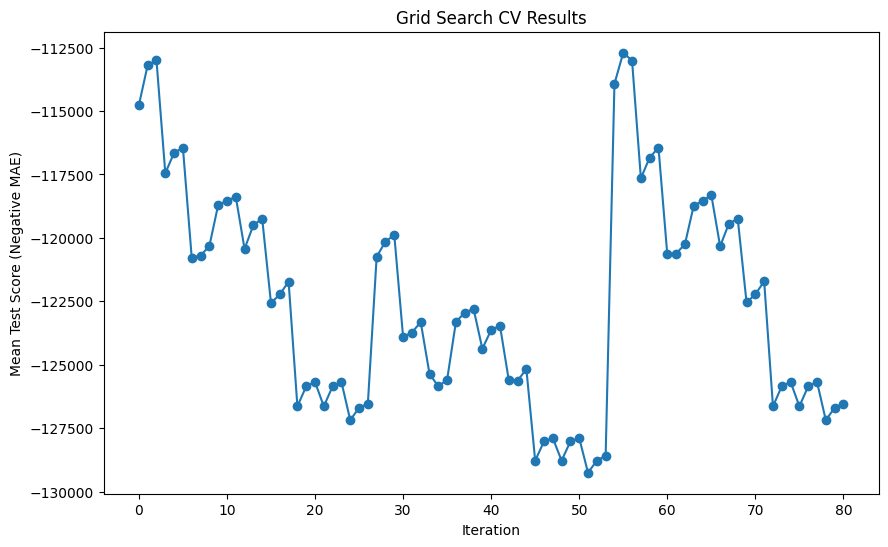

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Mean Squared Error: 116042.13409438459
Tuned Model R-squared (R2): 0.7761963094519461


In [57]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# # Extract results
# results = grid_search.cv_results_

# # Plot the scores of each iteration
# plt.figure(figsize=(10, 6))
# plt.plot(results['mean_test_score'], marker='o')
# plt.title('Grid Search CV Results')
# plt.xlabel('Iteration')
# plt.ylabel('Mean Test Score (Negative MAE)')
# plt.show()

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

tuned_y_pred = grid_search.best_estimator_.predict(X_test)
tuned_mse = mean_squared_error(y_test, tuned_y_pred)
tuned_r2 = r2_score(y_test, tuned_y_pred)

print(f"Tuned Model Mean Squared Error: {tuned_mse}")
print(f"Tuned Model R-squared (R2): {tuned_r2}")


In [56]:
import pandas as pd

new_input_data = pd.read_csv('new_preprocess.csv') #first 5 in dataset

new_input_data.drop(columns=['Unnamed: 0'], inplace=True)
features = ['CPU Mark', 'GPU Mark', 'Monitor', 'Width', 'Height', 'RAM', 'Storage Amount','Encoded_Brand','Encoded_OS']

X_new_input = new_input_data[features]
predictions_new_input = rf_model.predict(X_new_input)

new_input_data['Predicted_Price'] = predictions_new_input
 
new_input_data[['Predicted_Price', 'Price']]


,Predicted_Price,Price
0,1829.341767,1529.00
1,2264.839318,2308.81
2,634.965650,614.99
3,1116.633192,1079.00
4,1971.522877,1907.00
5,360.694600,279.99
6,2086.872433,1499.00
7,1841.154733,1974.99
8,1036.385100,1399.99
9,1756.988200,1715.60
